In [45]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os
import shutil
from sklearn.model_selection import train_test_split

**cek folder tmp**

In [17]:
dir_path = '/tmp'
if os.path.exists(dir_path):
  shutil.rmtree(dir_path)

os.mkdir(dir_path)
os.listdir()

['.config', 'sample_data']

**download dataset submission dan diupload ke github supaya memudahkan**

In [18]:
!wget --no-check-certificate \
  https://github.com/MKhairulRamadhan/Machine-Learning-Dicoding/blob/master/rockpaperscissors.zip?raw=true -O /tmp/rockpaperscissors.zip

--2020-07-31 04:43:48--  https://github.com/MKhairulRamadhan/Machine-Learning-Dicoding/blob/master/rockpaperscissors.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MKhairulRamadhan/Machine-Learning-Dicoding/raw/master/rockpaperscissors.zip [following]
--2020-07-31 04:43:49--  https://github.com/MKhairulRamadhan/Machine-Learning-Dicoding/raw/master/rockpaperscissors.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MKhairulRamadhan/Machine-Learning-Dicoding/master/rockpaperscissors.zip [following]
--2020-07-31 04:43:49--  https://raw.githubusercontent.com/MKhairulRamadhan/Machine-Learning-Dicoding/master/rockpaperscissors.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.1

**Extract dataset**

In [21]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir(dir_path)

['rock', 'paper', 'rockpaperscissors.zip', 'scissors']

**split dataset**

In [25]:
# lokasi rock
rock_dir = os.path.join(dir_path, 'rock')
# lokasi paper
paper_dir = os.path.join(dir_path, 'paper')
# lokasi scissors
scissors_dir = os.path.join(dir_path, 'scissors')

In [27]:
# training dan validation rock
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4, random_state=42, shuffle=False)
# train dan validation paper
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4, random_state=42, shuffle=False)
# train dan balid scissor
train_scissor_dir, validation_scissor_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4, random_state=42, shuffle=False)


In [36]:
# path dir
train_dir = os.path.join(dir_path,'train')
validation_dir = os.path.join(dir_path, 'validation')

# path dir rock, paper, scissor
train_rock = os.path.join(train_directory, 'rock')
train_scissors = os.path.join(train_directory, 'scissors')
train_paper = os.path.join(train_directory, 'paper')
validation_rock = os.path.join(validation_directory, 'rock')
validation_scissors = os.path.join(validation_directory, 'scissors')
validation_paper = os.path.join(validation_directory, 'paper')

# buat dir baru untuk data baru
if not os.path.exists(train_directory):
  os.mkdir(train_directory)
if not os.path.exists(validation_directory):
  os.mkdir(validation_directory)

if not os.path.exists(validation_rock):
  os.mkdir(validation_rock)
if not os.path.exists(validation_scissors):
  os.mkdir(validation_scissors)
if not os.path.exists(validation_paper):
  os.mkdir(validation_paper)

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)

os.listdir(dir_path)

['rock', 'paper', 'rockpaperscissors.zip', 'train', 'validation', 'scissors']

In [37]:
# pindahkan data ke dir baru
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissor_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validation_rock,i))
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))
for i in validation_scissor_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

**model image generator**

In [38]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [40]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical') # 3 class label menggunakan class_mode = 'categorical'

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical') # 3 class label menggunakan class_mode = 'categorical'



Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**model sequential**

In [41]:
model_sequential = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax') # class label ada 3, menggunakan softmax
])

In [42]:
model_sequential.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**train**

In [43]:
model_sequential.fit(
      train_generator,
      steps_per_epoch=25,  # batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, #akurasi pengujian data validasi
      validation_steps=5,  #batch yang dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 1.0993 - accuracy: 0.4400 - val_loss: 1.1129 - val_accuracy: 0.2500
Epoch 2/20
25/25 - 8s - loss: 1.1045 - accuracy: 0.3800 - val_loss: 1.1020 - val_accuracy: 0.2500
Epoch 3/20
25/25 - 7s - loss: 1.1008 - accuracy: 0.2900 - val_loss: 1.1072 - val_accuracy: 0.2500
Epoch 4/20
25/25 - 8s - loss: 1.0992 - accuracy: 0.3800 - val_loss: 1.0932 - val_accuracy: 0.4000
Epoch 5/20
25/25 - 7s - loss: 1.0959 - accuracy: 0.3500 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 6/20
25/25 - 8s - loss: 1.0838 - accuracy: 0.4000 - val_loss: 0.9622 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 8s - loss: 1.1020 - accuracy: 0.4900 - val_loss: 1.0221 - val_accuracy: 0.6000
Epoch 8/20
25/25 - 8s - loss: 0.9925 - accuracy: 0.5900 - val_loss: 0.9896 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 7s - loss: 0.7601 - accuracy: 0.7000 - val_loss: 0.4428 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 7s - loss: 0.7075 - accuracy: 0.6800 - val_loss: 0.4093 - val_accuracy: 0.8500
Epoch 11/20
25/25 -

**tes model yang dibuat**

Saving ss.PNG to ss.PNG
ss.PNG
scissors


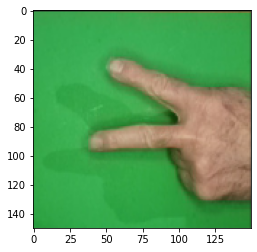

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # prediksi gambar
  path = fn 
  gambar = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_sequential.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')